In [26]:
from sklearn.datasets import fetch_lfw_people

In [27]:
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape

In [28]:
type(people)

sklearn.utils.Bunch

In [29]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [30]:
people.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

In [31]:
people.target

array([61, 25,  9, ..., 14, 15, 14], dtype=int64)

In [32]:
people.target.shape

(3023,)

In [33]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [34]:
people.target_names.shape

(62,)

In [35]:
people.data

array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
         22.666666],
       [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
          9.333333],
       [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
         25.666666],
       ...,
       [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
        230.66667 ],
       [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
         96.333336],
       [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
         42.333332]], dtype=float32)

In [36]:
people.data.shape # 3023 adet kayıt var, 5655(87x65) adet sütun var. Feature ...

(3023, 5655)

In [37]:
people.images.shape # Görülüyorki 3023 adet resim var ve 87x65 boyutundalar.

(3023, 87, 65)

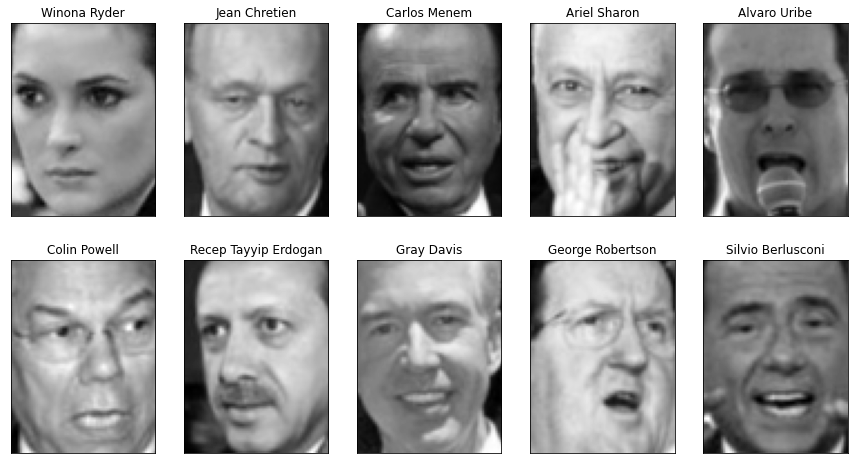

In [38]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target,image,ax in zip(people.target, people.images,axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [39]:
print("People images shape: ",people.images.shape)
print("Numbe of clases : ", len(people.target_names))


People images shape:  (3023, 87, 65)
Numbe of clases :  62


In [40]:
import numpy as np
counts = np.bincount(people.target)
for i, (count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25} {1:3}".format(name,count),end=' ')
    if (i+1) %3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [41]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1 
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people /255.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn.fit(X_train,y_train)
print(f"Train Acc:{knn.score(X_train,y_train):.2f}\nTest Acc:{knn.score(X_test,y_test):.2f}")

Train Acc:0.54
Test Acc:0.22


## Principal Component Analysis (PCA)
> Hem özellik çıkarımında hem de görselleştirmede kullanılan gözetimsiz makine öğrenmesi algoritması

In [51]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=100,whiten=True,random_state=0)

In [54]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}\nX_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (1547, 100)
X_test_pca shape: (516, 100)


In [55]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca,y_train)
print(f"Train Acc:{knn_pca.score(X_train_pca,y_train):.2f}\nTest Acc:{knn_pca.score(X_test_pca,y_test):.2f}")

Train Acc:0.60
Test Acc:0.24


In [56]:
print("pca.components.shape: ",pca.components_.shape)

pca.components.shape:  (100, 5655)


In [57]:
print("pca components: \n",pca.components_ )

pca components: 
 [[-2.80053169e-03 -3.34965414e-03 -4.00078669e-03 ... -5.65135852e-03
  -5.14661008e-03 -4.39910917e-03]
 [ 1.40067572e-02  1.36567196e-02  1.39008947e-02 ... -1.96435396e-02
  -1.84993353e-02 -1.72561072e-02]
 [-2.86945328e-02 -2.98412554e-02 -3.12132817e-02 ...  5.69764990e-04
   1.09060213e-03  1.49346294e-03]
 ...
 [-1.92251913e-02 -1.53177725e-02 -6.10341271e-03 ...  1.73268836e-05
  -1.95553750e-02 -3.51662077e-02]
 [ 1.45774651e-02  1.25267375e-02  8.57014768e-03 ... -2.87594162e-02
  -4.42305766e-02 -4.52530906e-02]
 [-1.00866659e-03 -3.04544694e-04 -4.01500100e-03 ... -1.12708462e-02
  -8.73101875e-03 -8.09151120e-03]]


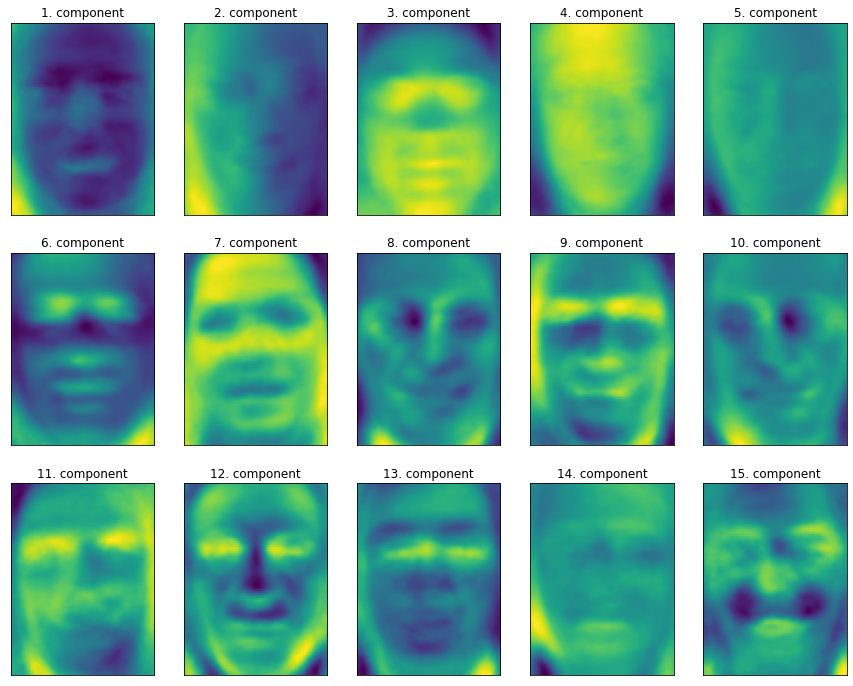

In [58]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))


## PCA for Breast Cancer 

In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [75]:
cancer = load_breast_cancer()


scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [76]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Orig shape: ",X_scaled.shape)
print("After PCA shape:", X_pca.shape)

Orig shape:  (569, 30)
After PCA shape: (569, 2)


In [84]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


## Non-negative Matrix Factorization (NMF)
> Özellik çıkarımında kullanılan diğer bir gözetimsiz makine öğrenmesi algoritması

In [59]:
from sklearn.decomposition import NMF

In [60]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

C:\Users\umtsr\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=15, random_state=0)

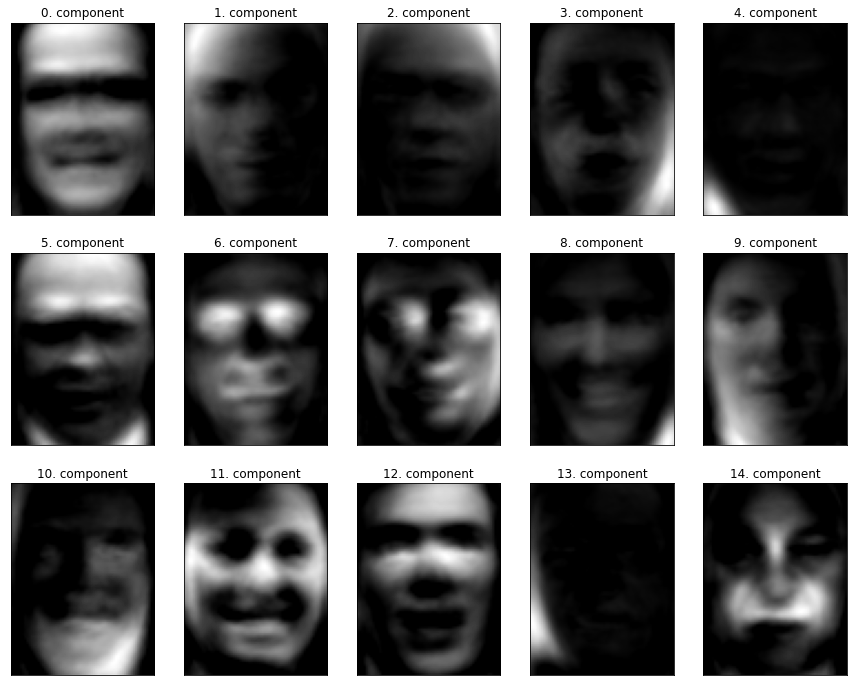

In [68]:
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),cmap='gray')
 ax.set_title("{}. component".format(i))


## Manifold Learning with t-SNE

In [62]:
from sklearn.datasets import load_digits

In [64]:
digits = load_digits()

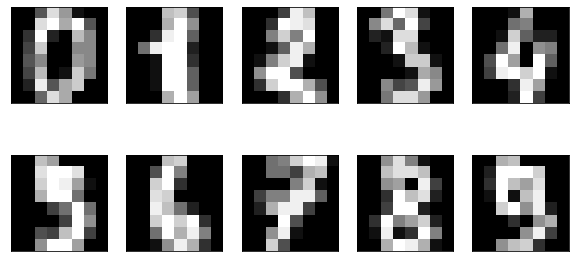

In [67]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img, cmap='gray')

Text(0, 0.5, 'Second principal component')

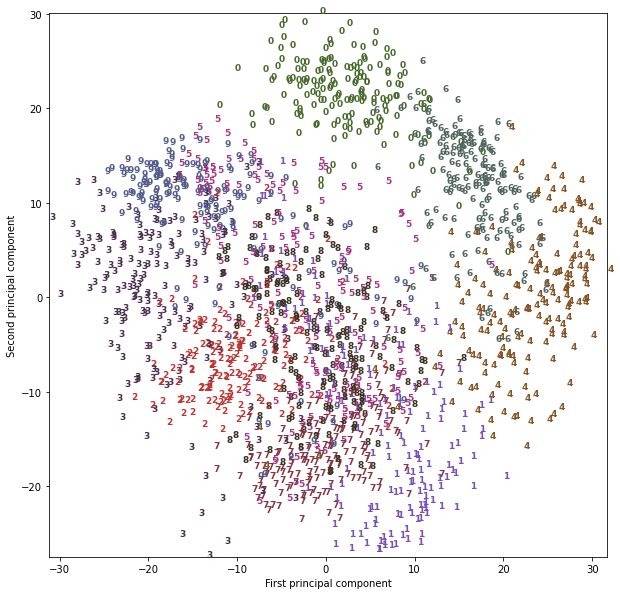

In [69]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE feature 1')

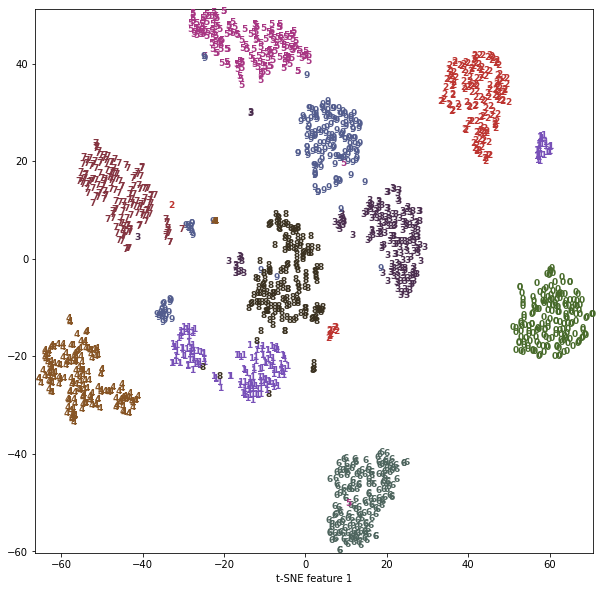

In [72]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
